In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

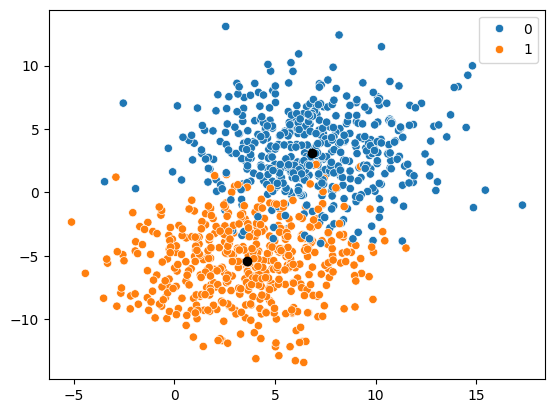

In [4]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [5]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,1.995096,-6.065542,1.0
1,3.659731,-6.103879,1.0
2,4.696133,3.393210,0.0
3,3.517393,-2.088409,1.0
4,2.487773,-6.308793,1.0
...,...,...,...
995,5.304171,-4.592947,1.0
996,6.156982,0.143099,0.0
997,-3.352567,-5.256451,1.0
998,7.039951,4.634301,0.0


In [6]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

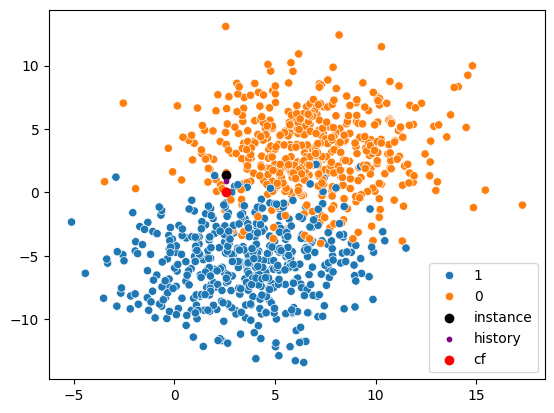

In [7]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

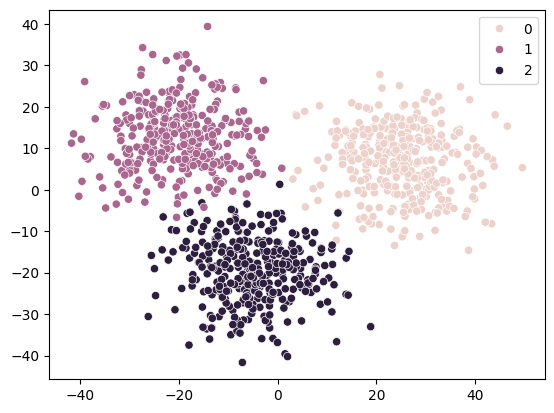

In [8]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [9]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-4.518599,-5.388003,7.463214,15.035568,10.995274,7.491321,-22.213978,-12.383708,-2.712996,7.835782,...,-3.603696,1.581990,-4.163626,-7.786069,0.979413,-19.431012,-8.529176,9.318846,-2.420009,0.0
1,-5.169610,-19.389376,6.351420,5.501766,-0.245920,-30.960695,0.735278,15.012493,8.332963,-2.364209,...,3.094497,-11.908489,-1.561962,17.528955,-5.914812,16.204455,-8.303661,-8.828655,-5.307082,1.0
2,-0.570739,-12.649507,13.039292,-1.513182,-18.407979,-2.268710,-20.662974,4.415463,9.954384,4.185887,...,12.474459,2.457544,-18.143167,-6.839168,-1.125627,0.562966,-13.649028,2.319119,1.323900,2.0
3,-6.912080,-12.948148,-0.205859,2.008408,-3.909138,-1.652378,-4.419518,-7.001332,4.065314,-2.615079,...,15.286977,3.781509,-14.829797,8.587901,13.042717,1.598011,2.375903,-14.064824,19.576505,2.0
4,1.825194,-1.593537,-3.528763,-12.071920,1.995141,0.471541,5.761711,14.288420,-0.508343,1.312792,...,5.455393,13.299986,-11.216491,-9.564053,4.424221,9.292728,-9.894920,8.435824,7.520414,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.385841,3.174947,-9.109591,-8.615260,-3.145031,-1.644408,-33.849330,2.399011,0.895759,13.451972,...,19.490138,8.894220,-10.220321,1.163488,-0.660391,9.477630,-9.700357,-6.664826,2.736972,2.0
996,6.488889,-5.064366,3.055336,7.909990,-7.149696,12.757155,-14.284839,-4.491995,-3.893486,7.361658,...,-3.107917,-2.242023,-10.357359,-6.972206,1.243637,-7.025986,-20.739944,-1.521591,10.523787,0.0
997,1.357864,-3.636807,0.634270,10.331538,10.376247,-3.047060,0.604262,6.152662,3.417141,-6.178999,...,8.323731,4.424308,-3.876090,12.905104,7.574401,2.180716,4.116727,-10.774366,11.613798,1.0
998,5.494378,-5.980341,-13.954736,-11.968627,-7.927583,-9.043530,-2.038957,7.962321,-3.508282,-15.287569,...,2.513914,11.375597,-11.971570,-3.784039,16.621773,4.391451,2.928356,0.364023,17.057530,1.0


In [71]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

target: 1.0 instance: 0.0


In [72]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

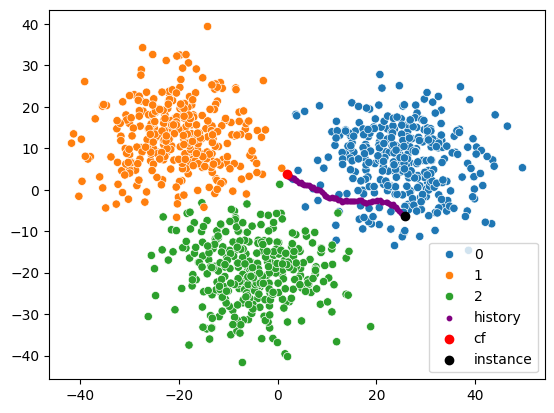

In [73]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()